********************************************
             Welcome to the Hospital         
          Patient Tracking and Management   
********************************************
                Doctor's Assistant          


1. View Patient Records
2. Track Patient Health
3. Exit



Enter your choice:  1



Displaying Patient Records:

+----+------------+---------+-----+---------------------+--------------+--------------+------------+
|    | Patient ID |  Name   | Age |      Diagnosis      |  Medication  | Health Score | Last Visit |
+----+------------+---------+-----+---------------------+--------------+--------------+------------+
| 0  |     1      |  David  | 72  |        Cold         | Amoxicillin  |      97      | 12-6-2023  |
| 1  |     2      | Michael | 32  |         Flu         |  Ibuprofen   |      57      | 18-6-2023  |
| 2  |     3      | Olivia  | 61  |      Migraine       | Atorvastatin |      80      | 12-4-2023  |
| 3  |     4      |  Laura  | 61  |      COVID-19       |  Ibuprofen   |      86      | 26-9-2023  |
| 4  |     5      |  John   | 43  | High Blood Pressure |  Zithromax   |      72      | 25-10-2023 |
| 5  |     6      |  David  | 78  |         Flu         |  Zithromax   |      98      | 22-7-2023  |
| 6  |     7      |  Emily  | 49  | High Blood Pressure |   V


Enter your choice:  2

Enter Patient ID to Track Health:  25


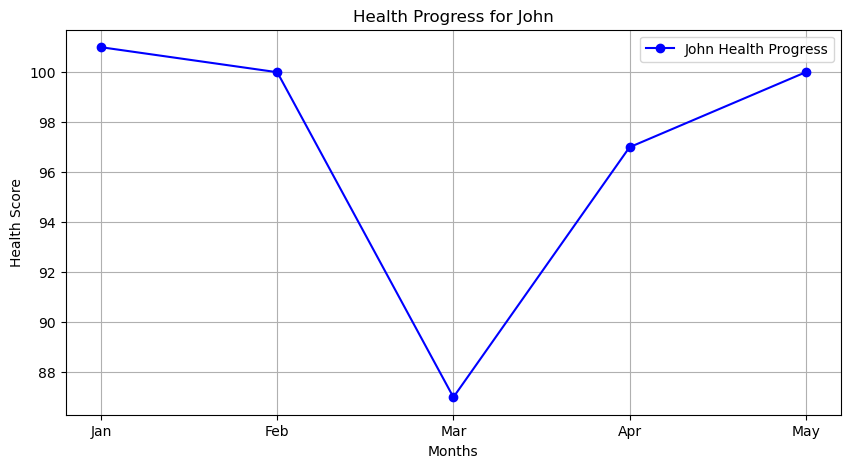

********************************************
             Welcome to the Hospital         
          Patient Tracking and Management   
********************************************
                Doctor's Assistant          


1. View Patient Records
2. Track Patient Health
3. Exit



Enter your choice:  2

Enter Patient ID to Track Health:  14


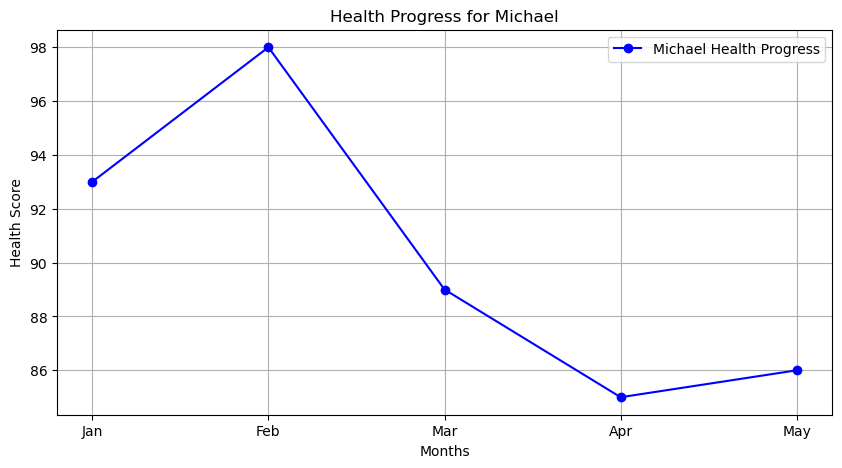

********************************************
             Welcome to the Hospital         
          Patient Tracking and Management   
********************************************
                Doctor's Assistant          


1. View Patient Records
2. Track Patient Health
3. Exit


In [ ]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

# ANSI color codes for text styling
class ConsoleColors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# Sample Data for Patients
def generate_patient_data(num_patients):
    names = ['John', 'Anna', 'Robert', 'Emily', 'Michael', 'Sarah', 'David', 'Laura', 'James', 'Olivia']
    diagnoses = ['Flu', 'Cold', 'Back Pain', 'Headache', 'Diabetes', 'Asthma', 'High Blood Pressure', 'COVID-19', 'Migraine', 'Cancer']
    medications = ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Insulin', 'Ventolin', 'Amoxicillin', 'Amlodipine', 'Zithromax', 'Hydrocodone', 'Atorvastatin']

    patients = []
    for i in range(num_patients):
        patient = {
            'Patient ID': i + 1,
            'Name': random.choice(names),
            'Age': random.randint(20, 80),
            'Diagnosis': random.choice(diagnoses),
            'Medication': random.choice(medications),
            'Health Score': random.randint(50, 100),
            'Last Visit': f"{random.randint(1, 30)}-{random.randint(1, 12)}-2023"
        }
        patients.append(patient)
    return pd.DataFrame(patients)

# Generate 50+ patient records
patient_df = generate_patient_data(50)

# Function to show a simple banner and welcome message
def welcome_message():
    print(ConsoleColors.OKGREEN + ConsoleColors.BOLD + "********************************************")
    print("             Welcome to the Hospital         ")
    print("          Patient Tracking and Management   ")
    print("********************************************")
    print("                Doctor's Assistant          ")
    print(ConsoleColors.ENDC)
    print("")

# Function to display patients data in a tabular format
def display_patients():
    print("\n" + ConsoleColors.OKBLUE + "Displaying Patient Records:\n" + ConsoleColors.ENDC)
    print(tabulate(patient_df, headers='keys', tablefmt='pretty'))

# Function to plot patient health progress
def plot_health_progress(patient_id):
    patient = patient_df.loc[patient_df['Patient ID'] == patient_id].iloc[0]
    patient_name = patient['Name']
    health_scores = [patient['Health Score'] + random.randint(-10, 10) for _ in range(5)]
    dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May']

    plt.figure(figsize=(10, 5))
    plt.plot(dates, health_scores, marker='o', color='b', label=f'{patient_name} Health Progress')
    plt.title(f'Health Progress for {patient_name}')
    plt.xlabel('Months')
    plt.ylabel('Health Score')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to track patient health based on ID
def track_health():
    patient_id = int(input(ConsoleColors.WARNING + "\nEnter Patient ID to Track Health: " + ConsoleColors.ENDC))
    if patient_id in patient_df['Patient ID'].values:
        plot_health_progress(patient_id)
    else:
        print(ConsoleColors.FAIL + "Patient ID not found. Please try again." + ConsoleColors.ENDC)

# Main Menu
def main_menu():
    while True:
        welcome_message()
        print(f"{ConsoleColors.OKGREEN}1. View Patient Records")
        print(f"2. Track Patient Health")
        print(f"3. Exit{ConsoleColors.ENDC}")

        try:
            choice = int(input("\nEnter your choice: "))
            if choice == 1:
                display_patients()
            elif choice == 2:
                track_health()
            elif choice == 3:
                print(ConsoleColors.OKBLUE + "Thank you for using the Hospital Management System. Goodbye!" + ConsoleColors.ENDC)
                break
            else:
                print(ConsoleColors.FAIL + "Invalid choice, please try again." + ConsoleColors.ENDC)
        except ValueError:
            print(ConsoleColors.FAIL + "Invalid input. Please enter a valid number." + ConsoleColors.ENDC)

if __name__ == "__main__":
    main_menu()
